### Basic classification: Classify images of clothing 
- 참조사이트 : https://www.tensorflow.org/tutorials/keras/classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-04-15 22:41:19.166847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


Label	Class
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Explore the data

In [6]:
print(train_images.shape, len(train_labels))
print(test_images.shape, len(test_labels))
print(np.unique(train_labels).size)

(60000, 28, 28) 60000
(10000, 28, 28) 10000
10


#### Preprocess the data

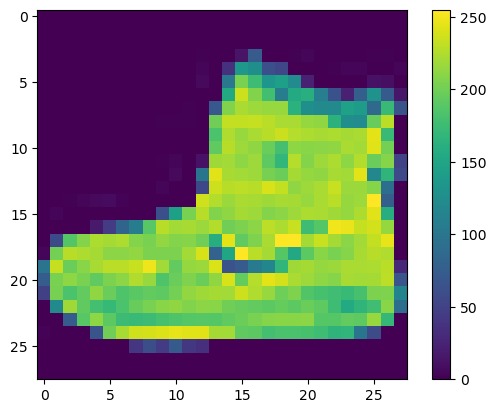

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. <br>
훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

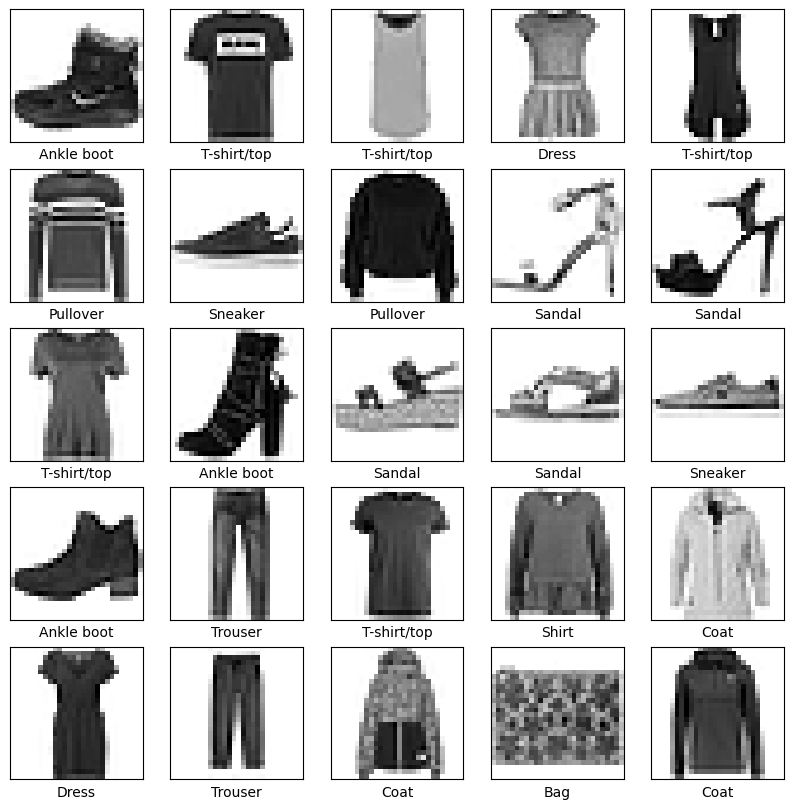

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# 훈련세트 전처리 확인

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Model 구성

In [14]:
#층설정
model = tf.keras.Sequential([
    # 2차원 배열의 이미지 픽셀의 이미지 포맷을 1차원 배열로 변환하는 층
    tf.keras.layers.Flatten(input_shape=train_images.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2023-04-15 23:02:36.367456: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 23:02:36.368195: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 훈련
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4999 - accuracy: 0.8247
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3738 - accuracy: 0.8657
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3340 - accuracy: 0.8768
Epoch 4/100
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3107 - accuracy: 0.8865
Epoch 5/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2920 - accuracy: 0.8932
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2800 - accuracy: 0.8964
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2670 - accuracy: 0.8998
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2566 - accuracy: 0.9037
Epoch 9/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2475 - accuracy: 0.9077
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step 

In [16]:
# 예측하기
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 [==============================] - 1s 3ms/step


In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

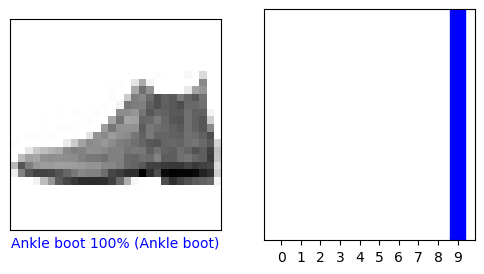

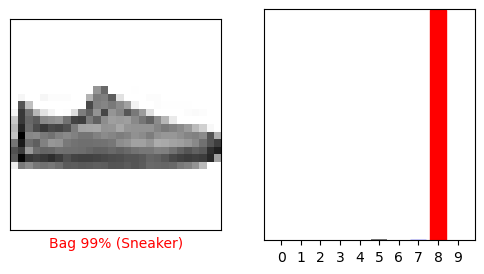

In [19]:
#예측 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

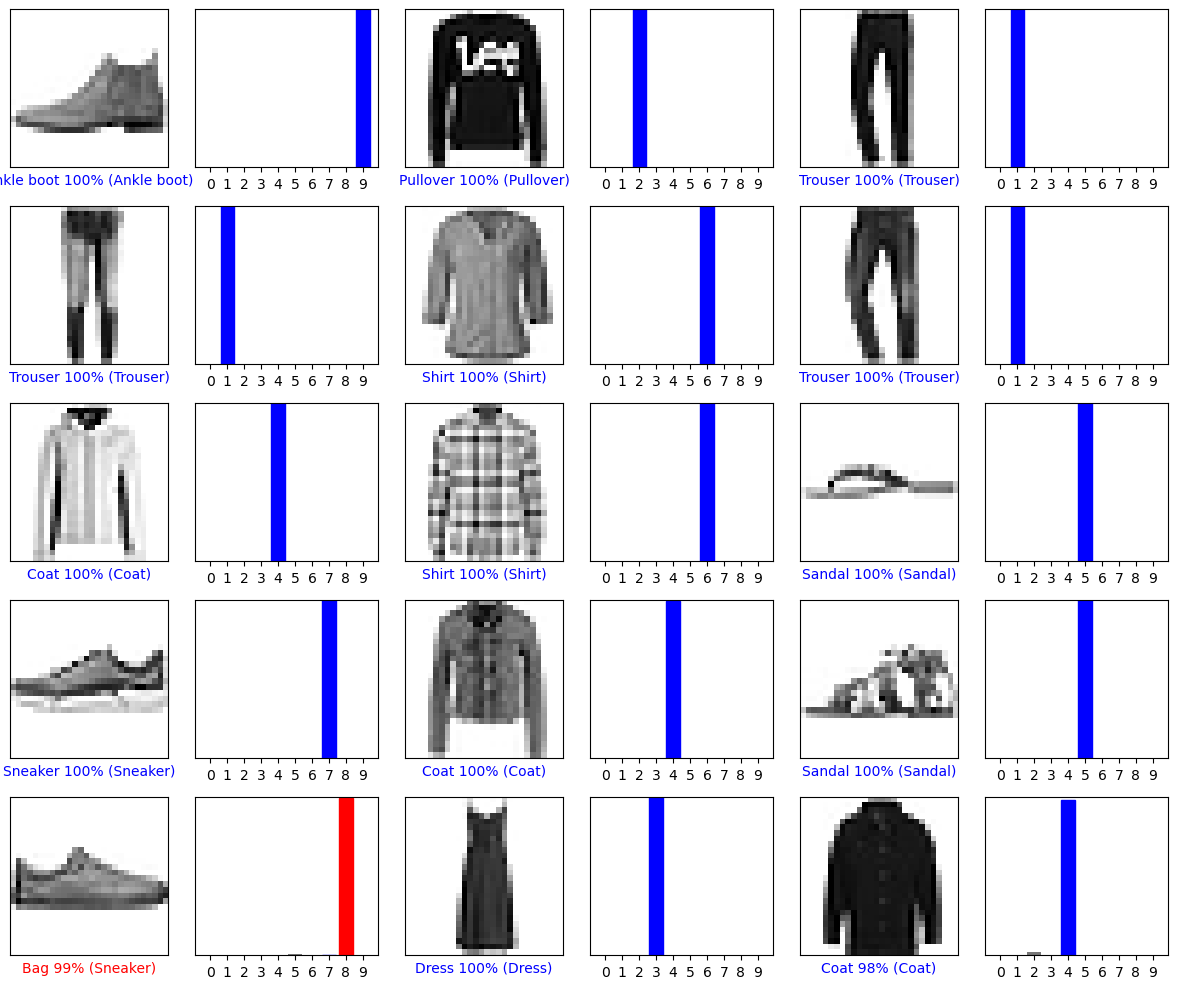

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### 훈련된 모델 사용하기

In [21]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

# Add the image to a batch where it's the only member.
# tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:
img = (np.expand_dims(img,0))
print(img.shape)

(28, 28)
(1, 28, 28)


1/1 [==============================] - 0s 19ms/step
[[8.1074774e-07 1.4777281e-22 9.9999881e-01 4.7595774e-33 2.9555704e-07
  3.8590173e-16 8.0827768e-08 5.1885061e-21 7.3499130e-23 3.6107245e-36]]


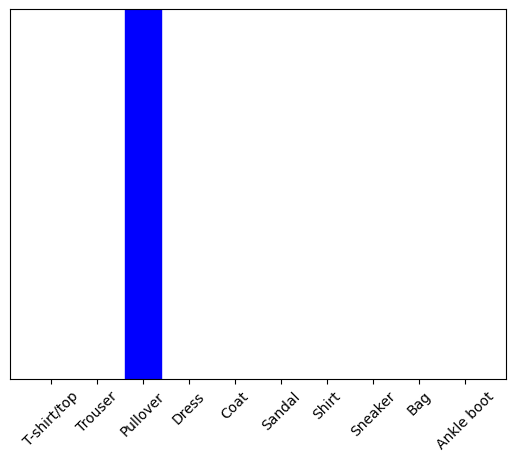

In [22]:
predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [23]:
# 라벨 값 확인하기
np.argmax(predictions_single[0])

2